## Proyecto K Modes Clustering - Solución

Para este proyecto, intentaremos utilizar KModes Clustering para agrupar las personas basado en ciertas variables de un censo en estados unidos.
___

## Los datos

Usaremos un set de datos con 30,168 observaciones sobre las siguientes 8 variables.
* Job: trabajo
* Education: educación
* marital status: estado civil
* Relationship: relación sentimiental
* Race: raza
* Sex: sexo
* Native Country: pais de origen
* Annual Salaries: salario anual

## Importar librerías

**Importe las librería que usa habitualmente para el análisis de datos.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Lea el archivo Census.xlsx a con read_excel.**

In [2]:
df = pd.read_excel('Census.xlsx')

**Verifique el encabezado de los datos**

In [3]:
df.head()

,Job,Education,marital status,Relationship,Race,Sex,Native Country,Annual Salaries
0,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,<=50K


**Compruebe los métodos info () y describe () en los datos.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30169 entries, 0 to 30168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job              30169 non-null  object
 1   Education        30169 non-null  object
 2   marital status   30169 non-null  object
 3   Relationship     30169 non-null  object
 4   Race             30169 non-null  object
 5   Sex              30169 non-null  object
 6   Native Country   30169 non-null  object
 7   Annual Salaries  30169 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [5]:
df.describe()

,Job,Education,marital status,Relationship,Race,Sex,Native Country,Annual Salaries
count,30169,30169,30169,30169,30169,30169,30169,30169
unique,8,16,7,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,<=50K
freq,22286,9841,14066,12463,25938,20385,27511,22661


# Creando los clusters (grupos)

Utilice el metodo Huang para el hiperparametro init

**Importe el algoritmo KModes de la librería kmodes.**

In [6]:
from kmodes.kmodes import KModes

**Evalúe que cantidad de cluster es el más adecuado a traves del metodo del codo. En caso que tenga dudas vea el notebook de la clase donde graficamos la perdida con un bucle for para un rango de cantidad de cluster de 1 a 10.**

**Este paso puede que tarde un poco por la cantidad de datos**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 86201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4989, cost: 66686.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6284, cost: 62715.0
Run 1, iteration: 2/100, moves: 280, cost: 62715.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7826, cost: 57116.0
Run 1, iteration: 2/100, moves: 1135, cost: 57116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7538, cost: 54116.0
Run 1, iteration: 2/100, moves: 1131, cost: 54116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7455, cost: 53660.0
Run 1, iteration: 2/100, moves: 1134, cost: 53660.0
Init

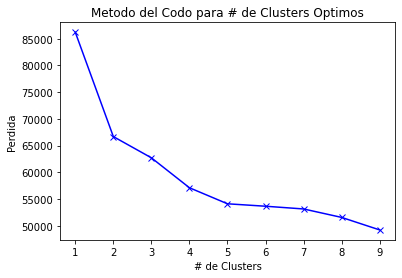

In [7]:
perdida = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    perdida.append(kmode.cost_)
    
plt.plot(K, perdida, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Perdida')
plt.title('Metodo del Codo para # de Clusters Optimos')
plt.show()

**Instancie el algoritmo con la cantidad de cluster que entienda adecuado segun el metodo del codo.**

In [8]:
kmode = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)

**Agregue una nueva columna con el cluster asignado a cada persona (fila).**

In [9]:
df['cluster'] = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7538, cost: 54116.0
Run 1, iteration: 2/100, moves: 1131, cost: 54116.0


**Especifique que cantidad de personas hay en cada grupo.**

In [10]:
df['cluster'].value_counts()

0    14900
1     6818
3     3218
2     2946
4     2287
Name: cluster, dtype: int64

**Vuelva a correr la asignación de cluster a la columna creada.**

In [11]:
df['cluster'] = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1590, cost: 54116.0


**Cree un dataframe con los centroides de los cluster. No olvides colocar el nombre de la columna de cada variable.**

In [12]:
df_cluster = pd.DataFrame(kmode.cluster_centroids_)
df_cluster.columns = df.columns
df_cluster

,Job,Education,marital status,Relationship,Race,Sex,Native Country,Annual Salaries,cluster
0,Private,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,<=50K,0
1,Private,Some-college,Never-married,Not-in-family,White,Female,United-States,<=50K,1
2,Private,HS-grad,Divorced,Unmarried,White,Female,United-States,<=50K,2
3,Private,Bachelors,Never-married,Not-in-family,White,Male,United-States,<=50K,3
4,Private,Some-college,Never-married,Own-child,White,Male,United-States,<=50K,4
